# Train Attention with Augmentation

In [12]:
%load_ext autoreload
%autoreload 2

# Run if connected to remote Jupyter server
import os
# os.chdir('electrochemistry_sean_mcintosh/electrochem')
print(os.getcwd())

import wandb
import time
from easydict import EasyDict as edict
from random import seed
from random import randint
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical

from waylon_keras_utils import train_model
from waylon_layer_utils import AttentionLSTM


from utils import load_default_config, train_with_aug_kfold, \
                  train_with_aug

from constants import BEST_SW_COLS_MIN_VAL_LESS_THAN_30, \
                      LEAD_NO_50_COLS, \
                      COPPER_NO_500_COLS, \
                      CADMIUM_NO_50_COLS, \
                      HORIZONTAL_SYSTEMATIC_SHIFT_STD, \
                      VERTICAL_SYSTEMATIC_SHIFT_STD, \
                      VERTICAL_RANDOM_NOISE_SHIFT_STD, \
                      NOISE_SHIFT_SCALING_FACTOR

DEFAULT_SEED = 7
DATA_DIR = Path('../data')
MODELS_DIR = Path('../models')

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/notebooks/electrochemistry_sean_mcintosh/electrochem


FOLD 1/5


Epoch 1/100
 - 3s - loss: 0.8582 - accuracy: 0.6256 - val_loss: 0.5093 - val_accuracy: 0.7727
Epoch 2/100
 - 0s - loss: 0.3893 - accuracy: 0.8978 - val_loss: 0.2661 - val_accuracy: 0.8636
Epoch 3/100
 - 0s - loss: 0.2196 - accuracy: 0.9378 - val_loss: 0.1418 - val_accuracy: 0.9545
Epoch 4/100
 - 0s - loss: 0.1308 - accuracy: 0.9722 - val_loss: 0.0767 - val_accuracy: 0.9545
Epoch 5/100
 - 0s - loss: 0.0957 - accuracy: 0.9778 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0567 - accuracy: 0.9978 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0504 - accuracy: 0.9922 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0371 - accuracy: 0.9944 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0127 - accuracy: 1.0000 - val_

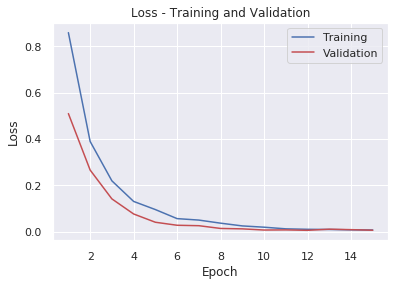

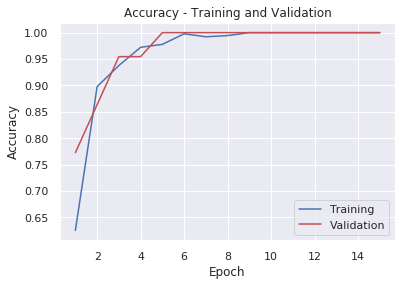

epoch,14
val_loss,0.00672
val_accuracy,1.0
loss,0.00759
accuracy,1.0
_runtime,23
_timestamp,1620995268
_step,17
best_val_loss,0.00628
best_epoch,11
lr,0.001


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_loss,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▇▇███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆▇▇███████████
_runtime,▁▂▃▃▃▃▃▅▅▅▅▅▆▆▇▇██
_timestamp,▁▂▃▃▃▃▃▅▅▅▅▅▆▆▇▇██
_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 2/5


Epoch 1/100
 - 3s - loss: 0.7815 - accuracy: 0.6933 - val_loss: 0.7162 - val_accuracy: 0.7273
Epoch 2/100
 - 0s - loss: 0.3713 - accuracy: 0.8678 - val_loss: 0.5252 - val_accuracy: 0.7727
Epoch 3/100
 - 0s - loss: 0.2045 - accuracy: 0.9522 - val_loss: 0.2114 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.1101 - accuracy: 0.9856 - val_loss: 0.1281 - val_accuracy: 0.9545
Epoch 5/100
 - 0s - loss: 0.0855 - accuracy: 0.9878 - val_loss: 0.1204 - val_accuracy: 0.9545
Epoch 6/100
 - 0s - loss: 0.0515 - accuracy: 0.9956 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0375 - accuracy: 0.9967 - val_loss: 0.0786 - val_accuracy: 0.9545
Epoch 8/100
 - 0s - loss: 0.0325 - accuracy: 0.9956 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0137 - accuracy: 1.0000 - val_

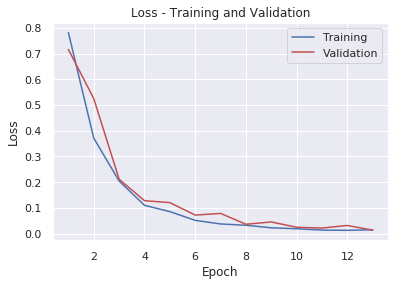

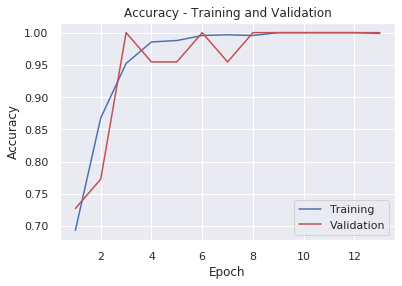

epoch,12
val_loss,0.01344
val_accuracy,1.0
loss,0.01498
accuracy,0.99889
_runtime,21
_timestamp,1620995300
_step,15
best_val_loss,0.01344
best_epoch,12
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▆▃▂▂▂▂▁▁▁▁▁▁
val_accuracy,▁▂█▇▇█▇██████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁
accuracy,▁▅▇██████████
_runtime,▁▃▃▃▄▄▅▅▅▅▆▆▆▇██
_timestamp,▁▃▃▃▄▄▅▅▅▅▆▆▆▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 3/5


Epoch 1/100
 - 4s - loss: 0.8434 - accuracy: 0.6356 - val_loss: 0.4977 - val_accuracy: 0.8182
Epoch 2/100
 - 0s - loss: 0.4509 - accuracy: 0.8111 - val_loss: 0.2874 - val_accuracy: 0.9091
Epoch 3/100
 - 0s - loss: 0.2371 - accuracy: 0.9400 - val_loss: 0.1572 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.1295 - accuracy: 0.9744 - val_loss: 0.1535 - val_accuracy: 0.9545
Epoch 5/100
 - 0s - loss: 0.0856 - accuracy: 0.9867 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0464 - accuracy: 0.9989 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0118 - accuracy: 1.0000 - val_

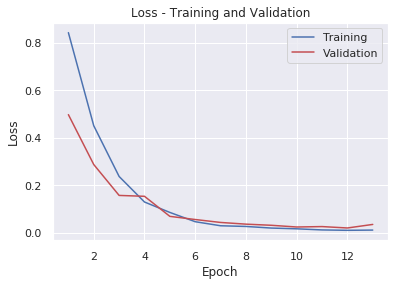

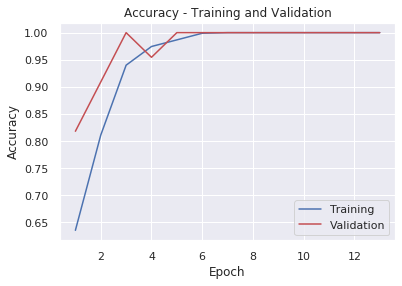

epoch,12
val_loss,0.03497
val_accuracy,1.0
loss,0.01111
accuracy,1.0
_runtime,22
_timestamp,1620995333
_step,15
best_val_loss,0.01999
best_epoch,11
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▅▃▃▂▂▁▁▁▁▁▁▁
val_accuracy,▁▅█▆█████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁
accuracy,▁▄▇██████████
_runtime,▁▃▃▃▄▄▅▅▅▅▆▆▆▇██
_timestamp,▁▃▃▃▄▄▅▅▅▅▆▆▆▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 4/5


Epoch 1/100
 - 4s - loss: 0.7865 - accuracy: 0.6933 - val_loss: 0.8224 - val_accuracy: 0.6667
Epoch 2/100
 - 0s - loss: 0.4497 - accuracy: 0.8122 - val_loss: 0.4831 - val_accuracy: 0.7619
Epoch 3/100
 - 1s - loss: 0.3022 - accuracy: 0.8767 - val_loss: 0.2474 - val_accuracy: 0.9048
Epoch 4/100
 - 0s - loss: 0.1786 - accuracy: 0.9578 - val_loss: 0.2632 - val_accuracy: 0.8571
Epoch 5/100
 - 0s - loss: 0.1004 - accuracy: 0.9878 - val_loss: 0.1463 - val_accuracy: 0.9048
Epoch 6/100
 - 0s - loss: 0.0680 - accuracy: 0.9922 - val_loss: 0.0605 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0463 - accuracy: 0.9989 - val_loss: 0.1229 - val_accuracy: 0.9524
Epoch 8/100
 - 0s - loss: 0.0356 - accuracy: 0.9989 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0145 - accuracy: 1.0000 - val_

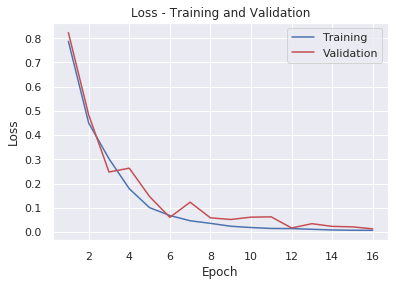

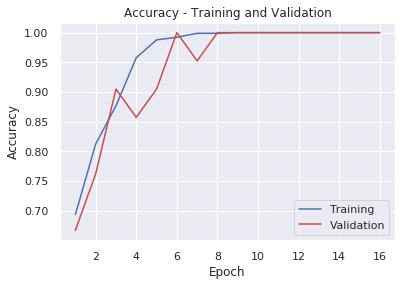

epoch,15
val_loss,0.0129
val_accuracy,1.0
loss,0.0069
accuracy,1.0
_runtime,25
_timestamp,1620995368
_step,18
best_val_loss,0.0129
best_epoch,15
lr,0.001


epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
val_loss,█▅▃▃▂▁▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▆▅▆█▇█████████
loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▇████████████
_runtime,▁▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇██
_timestamp,▁▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇██
_step,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 5/5


Epoch 1/100
 - 4s - loss: 0.8421 - accuracy: 0.6378 - val_loss: 0.5070 - val_accuracy: 0.7619
Epoch 2/100
 - 0s - loss: 0.4944 - accuracy: 0.7789 - val_loss: 0.4027 - val_accuracy: 0.8571
Epoch 3/100
 - 0s - loss: 0.3054 - accuracy: 0.9056 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.1691 - accuracy: 0.9611 - val_loss: 0.1498 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.1037 - accuracy: 0.9789 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0629 - accuracy: 0.9933 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0407 - accuracy: 0.9956 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0241 - accuracy: 0.9989 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0151 - accuracy: 0.9989 - val_

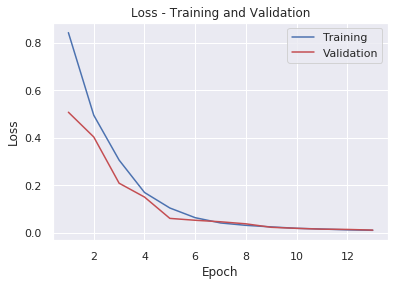

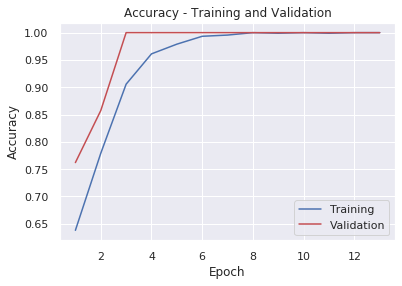

epoch,12
val_loss,0.01067
val_accuracy,1.0
loss,0.00973
accuracy,1.0
_runtime,25
_timestamp,1620995403
_step,15
best_val_loss,0.01067
best_epoch,12
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▇▄▃▂▂▁▁▁▁▁▁▁
val_accuracy,▁▄███████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇█████████
_runtime,▁▃▃▄▄▄▄▅▅▅▅▆▆▇██
_timestamp,▁▃▃▄▄▄▄▅▅▅▅▆▆▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished


In [6]:
config = load_default_config(drop_50_ppb_cols=True)
config.callbacks.save_model = True
config.data_processing.seed = 42

models_42 = train_with_aug_kfold(config)

FOLD 1/5


Epoch 1/100
 - 4s - loss: 0.8887 - accuracy: 0.5867 - val_loss: 0.5879 - val_accuracy: 0.7727
Epoch 2/100
 - 0s - loss: 0.5052 - accuracy: 0.7867 - val_loss: 0.3254 - val_accuracy: 0.9091
Epoch 3/100
 - 0s - loss: 0.3105 - accuracy: 0.8933 - val_loss: 0.1701 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.1698 - accuracy: 0.9656 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.1115 - accuracy: 0.9767 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0625 - accuracy: 0.9978 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0383 - accuracy: 0.9944 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0245 - accuracy: 0.9978 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0157 - accuracy: 1.0000 - val_

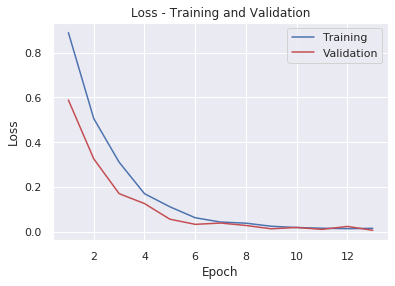

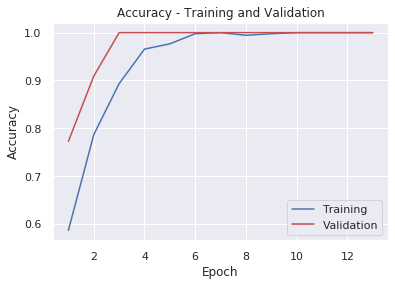

epoch,12
val_loss,0.00638
val_accuracy,1.0
loss,0.0152
accuracy,1.0
_runtime,26
_timestamp,1620995438
_step,15
best_val_loss,0.00638
best_epoch,12
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▅███████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇█████████
_runtime,▁▃▄▄▄▄▅▅▅▅▆▆▆▇██
_timestamp,▁▃▄▄▄▄▅▅▅▅▆▆▆▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 2/5


Epoch 1/100
 - 5s - loss: 0.7857 - accuracy: 0.6733 - val_loss: 0.4434 - val_accuracy: 0.8636
Epoch 2/100
 - 0s - loss: 0.3591 - accuracy: 0.8933 - val_loss: 0.2496 - val_accuracy: 0.9091
Epoch 3/100
 - 0s - loss: 0.2108 - accuracy: 0.9411 - val_loss: 0.1629 - val_accuracy: 0.9545
Epoch 4/100
 - 0s - loss: 0.1236 - accuracy: 0.9733 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.0918 - accuracy: 0.9789 - val_loss: 0.0808 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0612 - accuracy: 0.9911 - val_loss: 0.0633 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0428 - accuracy: 0.9956 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0207 - accuracy: 0.9989 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0158 - accuracy: 1.0000 - val_

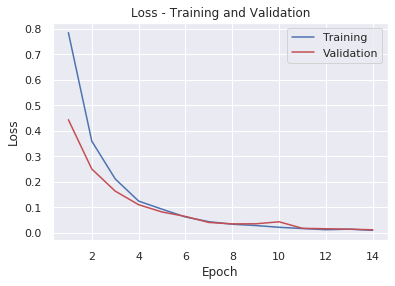

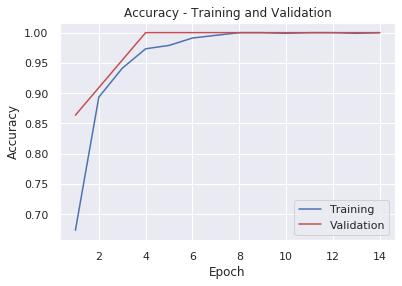

epoch,13
val_loss,0.01083
val_accuracy,1.0
loss,0.00878
accuracy,1.0
_runtime,28
_timestamp,1620995477
_step,16
best_val_loss,0.01083
best_epoch,13
lr,0.001


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
val_loss,█▅▃▃▂▂▁▁▁▂▁▁▁▁
val_accuracy,▁▃▆███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁
accuracy,▁▆▇▇██████████
_runtime,▁▃▃▃▄▅▅▅▅▅▅▅▆▇▇██
_timestamp,▁▃▃▃▄▅▅▅▅▅▅▅▆▇▇██
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 3/5


Epoch 1/100
 - 5s - loss: 0.7841 - accuracy: 0.6822 - val_loss: 0.6003 - val_accuracy: 0.8182
Epoch 2/100
 - 0s - loss: 0.3318 - accuracy: 0.9011 - val_loss: 0.2600 - val_accuracy: 0.9091
Epoch 3/100
 - 0s - loss: 0.1677 - accuracy: 0.9689 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.0951 - accuracy: 0.9811 - val_loss: 0.2085 - val_accuracy: 0.8636
Epoch 5/100
 - 1s - loss: 0.0653 - accuracy: 0.9922 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0144 - accuracy: 0.9989 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_

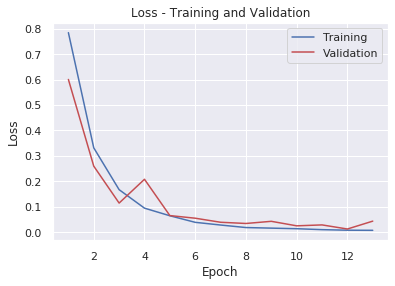

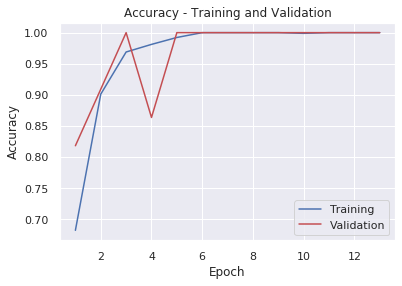

epoch,12
val_loss,0.04417
val_accuracy,1.0
loss,0.00812
accuracy,1.0
_runtime,28
_timestamp,1620995516
_step,15
best_val_loss,0.01326
best_epoch,11
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▄▂▃▂▂▁▁▁▁▁▁▁
val_accuracy,▁▅█▃█████████
loss,█▄▂▂▂▁▁▁▁▁▁▁▁
accuracy,▁▆▇██████████
_runtime,▁▃▃▃▄▄▅▅▅▅▅▅▆▇██
_timestamp,▁▃▃▃▄▄▅▅▅▅▅▅▆▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 4/5


Epoch 1/100
 - 5s - loss: 0.7999 - accuracy: 0.6922 - val_loss: 0.5028 - val_accuracy: 0.8571
Epoch 2/100
 - 0s - loss: 0.4349 - accuracy: 0.8211 - val_loss: 0.2941 - val_accuracy: 0.8571
Epoch 3/100
 - 0s - loss: 0.2564 - accuracy: 0.9267 - val_loss: 0.1680 - val_accuracy: 0.9524
Epoch 4/100
 - 0s - loss: 0.1393 - accuracy: 0.9667 - val_loss: 0.0832 - val_accuracy: 0.9524
Epoch 5/100
 - 0s - loss: 0.0734 - accuracy: 0.9956 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0452 - accuracy: 0.9989 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0520 - accuracy: 0.9867 - val_loss: 0.0747 - val_accuracy: 0.9524
Epoch 8/100
 - 1s - loss: 0.0628 - accuracy: 0.9856 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0170 - accuracy: 0.9989 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0139 - accuracy: 1.0000 - val_

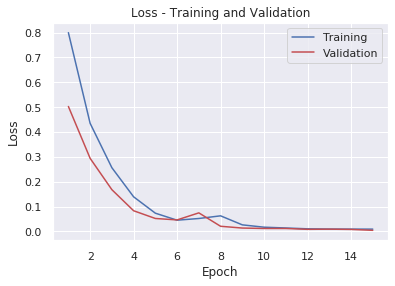

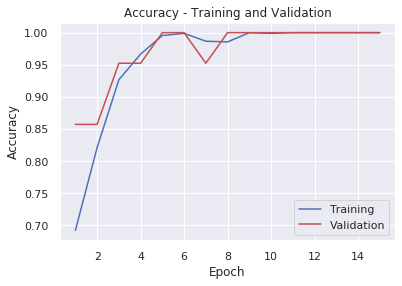

epoch,14
val_loss,0.00446
val_accuracy,1.0
loss,0.00921
accuracy,1.0
_runtime,31
_timestamp,1620995557
_step,17
best_val_loss,0.00446
best_epoch,14
lr,0.001


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_loss,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▁▆▆██▆████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇███████████
_runtime,▁▃▃▄▄▄▄▅▅▅▅▅▅▆▆▇██
_timestamp,▁▃▃▄▄▄▄▅▅▅▅▅▅▆▆▇██
_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 5/5


Epoch 1/100
 - 6s - loss: 0.8101 - accuracy: 0.6956 - val_loss: 0.7275 - val_accuracy: 0.5714
Epoch 2/100
 - 0s - loss: 0.4033 - accuracy: 0.8467 - val_loss: 0.4782 - val_accuracy: 0.7619
Epoch 3/100
 - 0s - loss: 0.2523 - accuracy: 0.9167 - val_loss: 0.3440 - val_accuracy: 0.9524
Epoch 4/100
 - 0s - loss: 0.1563 - accuracy: 0.9578 - val_loss: 0.2090 - val_accuracy: 0.9524
Epoch 5/100
 - 0s - loss: 0.0935 - accuracy: 0.9800 - val_loss: 0.1286 - val_accuracy: 0.9524
Epoch 6/100
 - 0s - loss: 0.0572 - accuracy: 0.9922 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.0536 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.0602 - accuracy: 0.9844 - val_loss: 0.0894 - val_accuracy: 0.9524
Epoch 9/100
 - 0s - loss: 0.0295 - accuracy: 0.9989 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0211 - accuracy: 1.0000 - val_

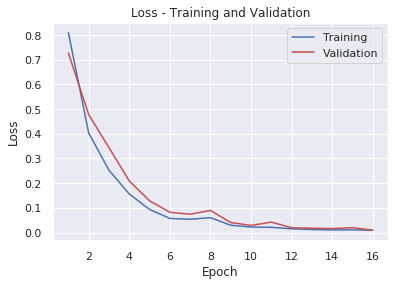

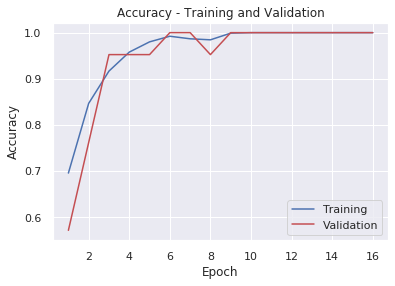

epoch,15
val_loss,0.00961
val_accuracy,1.0
loss,0.00886
accuracy,1.0
_runtime,32
_timestamp,1620995599
_step,18
best_val_loss,0.00961
best_epoch,15
lr,0.001


epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
val_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▄▇▇▇██▇████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇████████████
_runtime,▁▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆███
_timestamp,▁▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆███
_step,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished


In [7]:
config = load_default_config(drop_50_ppb_cols=True)
config.callbacks.save_model = True
config.data_processing.seed = 99

models_99 = train_with_aug_kfold(config)

FOLD 1/10


Epoch 1/100
 - 6s - loss: 0.8401 - accuracy: 0.6450 - val_loss: 0.3944 - val_accuracy: 0.9091
Epoch 2/100
 - 0s - loss: 0.3934 - accuracy: 0.8480 - val_loss: 0.2094 - val_accuracy: 0.9091
Epoch 3/100
 - 1s - loss: 0.2368 - accuracy: 0.9310 - val_loss: 0.1009 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.1631 - accuracy: 0.9490 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.0832 - accuracy: 0.9890 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0496 - accuracy: 0.9970 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0401 - accuracy: 0.9970 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0186 - accuracy: 0.9990 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0293 - accuracy: 0.9920 - val_

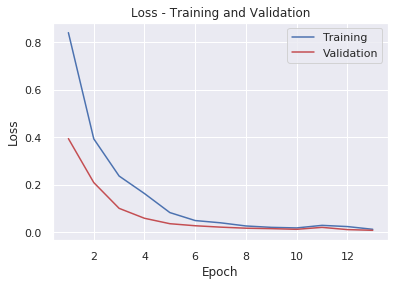

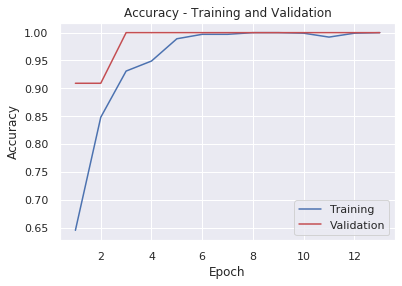

epoch,12
val_loss,0.00851
val_accuracy,1.0
loss,0.01277
accuracy,1.0
_runtime,32
_timestamp,1620995643
_step,15
best_val_loss,0.00851
best_epoch,12
lr,0.001


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▁███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁
accuracy,▁▅▇▇█████████
_runtime,▁▄▄▄▄▅▅▅▅▅▆▆▆███
_timestamp,▁▄▄▄▄▅▅▅▅▅▆▆▆███
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 2/10


Epoch 1/100
 - 6s - loss: 0.8541 - accuracy: 0.6240 - val_loss: 0.8551 - val_accuracy: 0.4545
Epoch 2/100
 - 1s - loss: 0.4997 - accuracy: 0.7920 - val_loss: 0.6592 - val_accuracy: 0.7273
Epoch 3/100
 - 1s - loss: 0.3147 - accuracy: 0.8820 - val_loss: 0.5675 - val_accuracy: 0.6364
Epoch 4/100
 - 1s - loss: 0.1714 - accuracy: 0.9590 - val_loss: 0.3202 - val_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.0872 - accuracy: 0.9850 - val_loss: 0.1878 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0529 - accuracy: 0.9960 - val_loss: 0.1748 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0421 - accuracy: 0.9920 - val_loss: 0.0993 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0303 - accuracy: 0.9990 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.0605 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0279 - accuracy: 0.9930 - val_

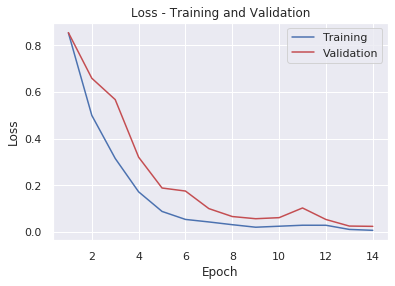

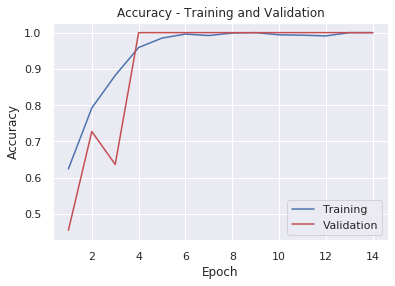

epoch,13
val_loss,0.02315
val_accuracy,1.0
loss,0.00612
accuracy,1.0
_runtime,34
_timestamp,1620995687
_step,16
best_val_loss,0.02315
best_epoch,13
lr,0.001


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
val_loss,█▆▆▃▂▂▂▁▁▁▂▁▁▁
val_accuracy,▁▅▃███████████
loss,█▅▄▂▂▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇██████████
_runtime,▁▃▃▄▄▄▅▅▅▆▆▆▆▆███
_timestamp,▁▃▃▄▄▄▅▅▅▆▆▆▆▆███
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 3/10


Epoch 1/100
 - 6s - loss: 0.8464 - accuracy: 0.6160 - val_loss: 0.6790 - val_accuracy: 0.6364
Epoch 2/100
 - 1s - loss: 0.5009 - accuracy: 0.7830 - val_loss: 0.4583 - val_accuracy: 0.8182
Epoch 3/100
 - 1s - loss: 0.3303 - accuracy: 0.8860 - val_loss: 0.2953 - val_accuracy: 0.9091
Epoch 4/100
 - 1s - loss: 0.2003 - accuracy: 0.9450 - val_loss: 0.2135 - val_accuracy: 0.9091
Epoch 5/100
 - 1s - loss: 0.1048 - accuracy: 0.9840 - val_loss: 0.1355 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0637 - accuracy: 0.9930 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0404 - accuracy: 0.9950 - val_loss: 0.1655 - val_accuracy: 0.9091
Epoch 8/100
 - 1s - loss: 0.0307 - accuracy: 0.9970 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0239 - accuracy: 0.9980 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0226 - accuracy: 0.9990 - val_loss: 0.1895 - val_accuracy: 0.8182
Epoch 11/100
 - 1s - loss: 0.0331 - accuracy: 0.9900 - val_

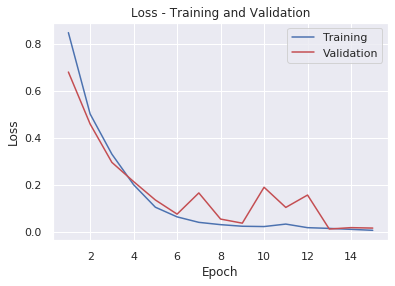

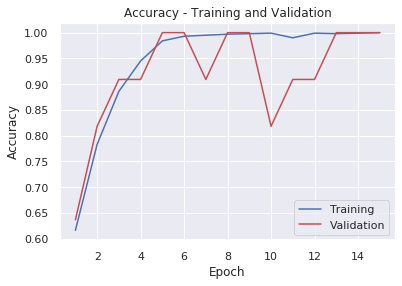

epoch,14
val_loss,0.0161
val_accuracy,1.0
loss,0.00662
accuracy,1.0
_runtime,36
_timestamp,1620995735
_step,17
best_val_loss,0.0121
best_epoch,12
lr,0.001


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_loss,█▆▄▃▂▂▃▁▁▃▂▃▁▁▁
val_accuracy,▁▅▆▆██▆██▅▆▆███
loss,█▅▄▃▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇███████████
_runtime,▁▃▄▄▄▅▅▅▅▅▅▆▆▆▆███
_timestamp,▁▃▄▄▄▅▅▅▅▅▅▆▆▆▆███
_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 4/10


Epoch 1/100
 - 7s - loss: 0.8298 - accuracy: 0.6270 - val_loss: 0.5667 - val_accuracy: 0.9091
Epoch 2/100
 - 1s - loss: 0.4710 - accuracy: 0.7960 - val_loss: 0.3674 - val_accuracy: 0.9091
Epoch 3/100
 - 1s - loss: 0.2872 - accuracy: 0.9060 - val_loss: 0.2521 - val_accuracy: 0.9091
Epoch 4/100
 - 1s - loss: 0.1598 - accuracy: 0.9580 - val_loss: 0.1431 - val_accuracy: 0.9091
Epoch 5/100
 - 1s - loss: 0.0824 - accuracy: 0.9970 - val_loss: 0.0995 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0531 - accuracy: 0.9990 - val_loss: 0.0892 - val_accuracy: 0.9091
Epoch 7/100
 - 1s - loss: 0.0456 - accuracy: 0.9910 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0325 - accuracy: 0.9970 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0184 - accuracy: 0.9990 - val_

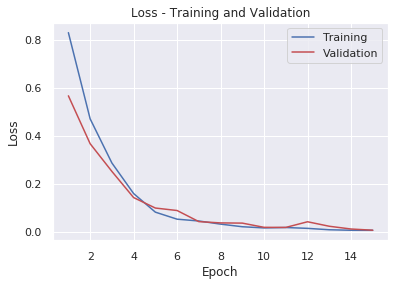

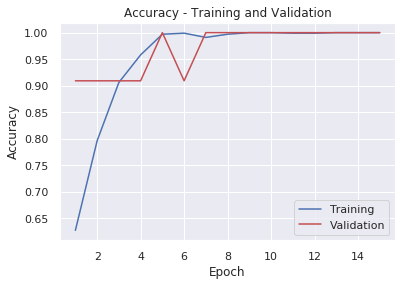

epoch,14
val_loss,0.00719
val_accuracy,1.0
loss,0.00672
accuracy,1.0
_runtime,37
_timestamp,1620995785
_step,17
best_val_loss,0.00719
best_epoch,14
lr,0.001


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁█▁█████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▇███████████
_runtime,▁▄▄▄▄▄▅▅▅▅▅▆▆▆▆███
_timestamp,▁▄▄▄▄▄▅▅▅▅▅▆▆▆▆███
_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 5/10


Epoch 1/100
 - 7s - loss: 0.8013 - accuracy: 0.6370 - val_loss: 0.5583 - val_accuracy: 0.6364
Epoch 2/100
 - 1s - loss: 0.3696 - accuracy: 0.8610 - val_loss: 0.2720 - val_accuracy: 1.0000
Epoch 3/100
 - 1s - loss: 0.2062 - accuracy: 0.9360 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 4/100
 - 1s - loss: 0.1207 - accuracy: 0.9830 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.0670 - accuracy: 0.9950 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0431 - accuracy: 0.9970 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0319 - accuracy: 0.9980 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0189 - accuracy: 0.9990 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0184 - accuracy: 0.9980 - val_

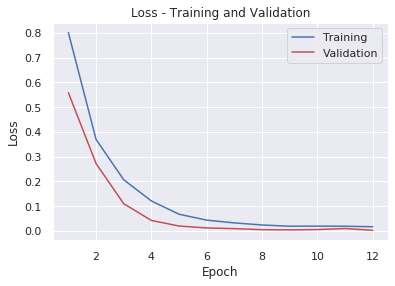

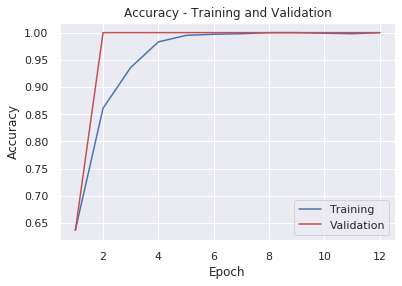

epoch,11
val_loss,0.00195
val_accuracy,1.0
loss,0.0165
accuracy,1.0
_runtime,38
_timestamp,1620995836
_step,14
best_val_loss,0.00195
best_epoch,11
lr,0.001


epoch,▁▂▂▃▄▄▅▅▆▇▇█
val_loss,█▄▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁███████████
loss,█▄▃▂▁▁▁▁▁▁▁▁
accuracy,▁▅▇█████████
_runtime,▁▃▄▄▄▅▅▅▅▅▆▆▇██
_timestamp,▁▃▄▄▄▅▅▅▅▅▆▆▇██
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
lr,▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 6/10


Epoch 1/100
 - 7s - loss: 0.8583 - accuracy: 0.6150 - val_loss: 0.5209 - val_accuracy: 0.8182
Epoch 2/100
 - 1s - loss: 0.4687 - accuracy: 0.8130 - val_loss: 0.2101 - val_accuracy: 0.9091
Epoch 3/100
 - 1s - loss: 0.2957 - accuracy: 0.9040 - val_loss: 0.3662 - val_accuracy: 0.8182
Epoch 4/100
 - 0s - loss: 0.1779 - accuracy: 0.9480 - val_loss: 0.1033 - val_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.0999 - accuracy: 0.9830 - val_loss: 0.0771 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0532 - accuracy: 0.9970 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0403 - accuracy: 0.9970 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0231 - accuracy: 0.9990 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0227 - accuracy: 0.9990 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0367 - accuracy: 0.9880 - val_

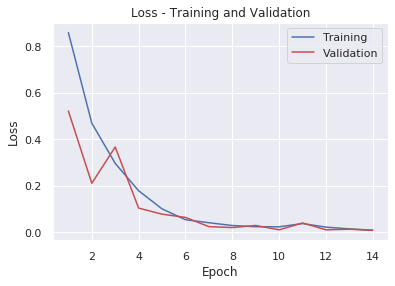

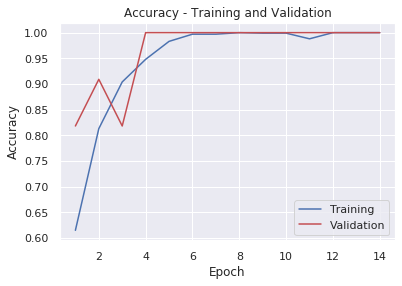

epoch,13
val_loss,0.00764
val_accuracy,1.0
loss,0.00803
accuracy,1.0
_runtime,49
_timestamp,1620995895
_step,16
best_val_loss,0.00764
best_epoch,13
lr,0.001


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
val_loss,█▄▆▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▅▁███████████
loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁
accuracy,▁▅▆▇██████████
_runtime,▁▃▃▃▃▄▄▄▄▄▅▅▅▅▆██
_timestamp,▁▃▃▃▃▄▄▄▄▄▅▅▅▅▆██
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 7/10


Epoch 1/100
 - 8s - loss: 0.7955 - accuracy: 0.6770 - val_loss: 0.2675 - val_accuracy: 0.9091
Epoch 2/100
 - 1s - loss: 0.3631 - accuracy: 0.8700 - val_loss: 0.0772 - val_accuracy: 1.0000
Epoch 3/100
 - 1s - loss: 0.2056 - accuracy: 0.9340 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 4/100
 - 1s - loss: 0.1071 - accuracy: 0.9870 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.0644 - accuracy: 0.9930 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0400 - accuracy: 0.9980 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0329 - accuracy: 0.9970 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0302 - accuracy: 0.9960 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0094 - accuracy: 1.0000 - val_

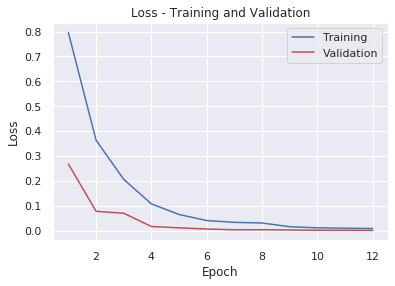

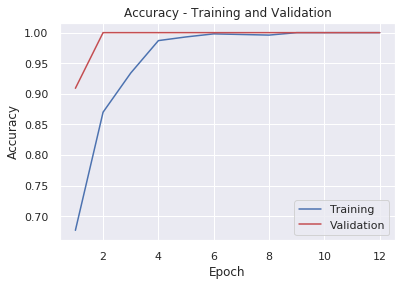

epoch,11
val_loss,0.00077
val_accuracy,1.0
loss,0.00794
accuracy,1.0
_runtime,40
_timestamp,1620995946
_step,14
best_val_loss,0.00077
best_epoch,11
lr,0.001


epoch,▁▂▂▃▄▄▅▅▆▇▇█
val_loss,█▃▃▁▁▁▁▁▁▁▁▁
val_accuracy,▁███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁
accuracy,▁▅▇█████████
_runtime,▁▄▄▄▄▄▅▅▅▅▅▆▇██
_timestamp,▁▄▄▄▄▄▅▅▅▅▅▆▇██
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
lr,▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 8/10


Epoch 1/100
 - 8s - loss: 0.8381 - accuracy: 0.6380 - val_loss: 0.4783 - val_accuracy: 0.8182
Epoch 2/100
 - 1s - loss: 0.3924 - accuracy: 0.8530 - val_loss: 0.2611 - val_accuracy: 0.8182
Epoch 3/100
 - 1s - loss: 0.2249 - accuracy: 0.9340 - val_loss: 0.3186 - val_accuracy: 0.8182
Epoch 4/100
 - 1s - loss: 0.1392 - accuracy: 0.9550 - val_loss: 0.0767 - val_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.0754 - accuracy: 0.9860 - val_loss: 0.0824 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0496 - accuracy: 0.9960 - val_loss: 0.1432 - val_accuracy: 0.9091
Epoch 7/100
 - 1s - loss: 0.0378 - accuracy: 0.9960 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0291 - accuracy: 0.9970 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0218 - accuracy: 0.9990 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 11/100
 - 0s - loss: 0.0254 - accuracy: 0.9940 - val_

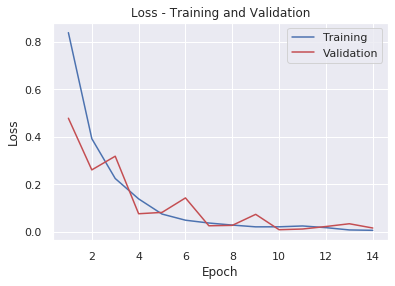

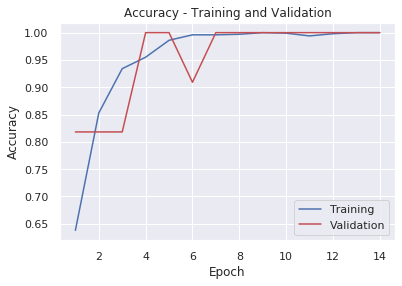

epoch,13
val_loss,0.01673
val_accuracy,1.0
loss,0.00706
accuracy,1.0
_runtime,42
_timestamp,1620995999
_step,16
best_val_loss,0.00956
best_epoch,9
lr,0.001


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
val_loss,█▅▆▂▂▃▁▁▂▁▁▁▁▁
val_accuracy,▁▁▁██▅████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁
accuracy,▁▅▇▇██████████
_runtime,▁▄▄▄▅▅▅▅▅▆▆▆▆▆███
_timestamp,▁▄▄▄▅▅▅▅▅▆▆▆▆▆███
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 9/10


Epoch 1/100
 - 8s - loss: 0.8210 - accuracy: 0.6560 - val_loss: 0.8022 - val_accuracy: 0.7000
Epoch 2/100
 - 1s - loss: 0.4007 - accuracy: 0.8320 - val_loss: 0.5416 - val_accuracy: 0.8000
Epoch 3/100
 - 0s - loss: 0.2301 - accuracy: 0.9410 - val_loss: 0.2902 - val_accuracy: 0.8000
Epoch 4/100
 - 1s - loss: 0.1432 - accuracy: 0.9620 - val_loss: 0.2266 - val_accuracy: 0.9000
Epoch 5/100
 - 1s - loss: 0.0837 - accuracy: 0.9830 - val_loss: 0.1083 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.0507 - accuracy: 0.9910 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0391 - accuracy: 0.9980 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 9/100
 - 1s - loss: 0.0265 - accuracy: 0.9950 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0140 - accuracy: 0.9990 - val_

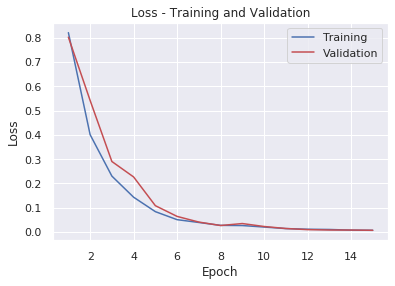

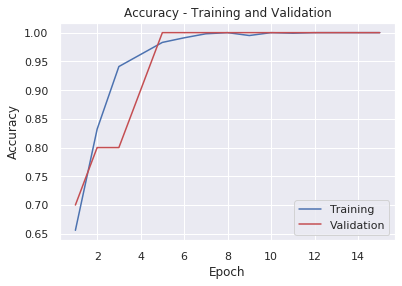

epoch,14
val_loss,0.00699
val_accuracy,1.0
loss,0.00683
accuracy,1.0
_runtime,44
_timestamp,1620996055
_step,17
best_val_loss,0.00699
best_epoch,14
lr,0.001


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_loss,█▆▃▃▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▃▆███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▇▇███████████
_runtime,▁▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇██
_timestamp,▁▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇██
_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 10/10


Epoch 1/100
 - 9s - loss: 0.8149 - accuracy: 0.6550 - val_loss: 0.2828 - val_accuracy: 0.9000
Epoch 2/100
 - 1s - loss: 0.3866 - accuracy: 0.8560 - val_loss: 0.0629 - val_accuracy: 1.0000
Epoch 3/100
 - 1s - loss: 0.2034 - accuracy: 0.9480 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 4/100
 - 1s - loss: 0.1169 - accuracy: 0.9710 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.0838 - accuracy: 0.9900 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/100
 - 1s - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 8/100
 - 1s - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.0208 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0143 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0160 - accuracy: 0.9980 - val_

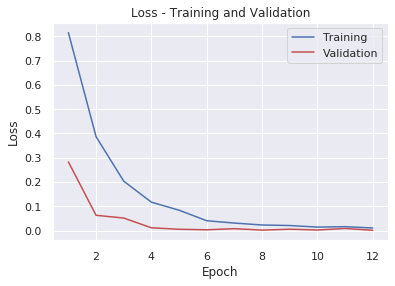

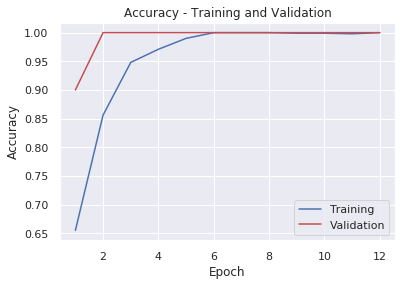

epoch,11
val_loss,0.00101
val_accuracy,1.0
loss,0.0105
accuracy,1.0
_runtime,44
_timestamp,1620996110
_step,14
best_val_loss,0.00101
best_epoch,11
lr,0.001


epoch,▁▂▂▃▄▄▅▅▆▇▇█
val_loss,█▃▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁███████████
loss,█▄▃▂▂▁▁▁▁▁▁▁
accuracy,▁▅▇▇████████
_runtime,▁▄▄▅▅▅▅▅▅▆▆▆▇██
_timestamp,▁▄▄▅▅▅▅▅▅▆▆▆▇██
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
lr,▁▁▁▁▁▁▁▁▁▁▁


wandb run finished


In [8]:
config = load_default_config(drop_50_ppb_cols=True)
config.callbacks.save_model = True
config.data_processing.seed = 10
config.data_processing.n_splits = 10

models_10 = train_with_aug_kfold(config)

In [10]:
(None, None)

(None, None)

In [9]:
mod = models_99['fold_1']

{'fold_1': <keras.engine.sequential.Sequential at 0x7ff23d493588>,
 'fold_2': <keras.engine.sequential.Sequential at 0x7ff23b6f2160>,
 'fold_3': <keras.engine.sequential.Sequential at 0x7ff23dc0acf8>,
 'fold_4': <keras.engine.sequential.Sequential at 0x7ff2383e45f8>,
 'fold_5': <keras.engine.sequential.Sequential at 0x7ff232834b38>}

# Train Final Model

In [11]:
from utils import train_final_model

config = load_default_config(drop_50_ppb_cols=True)
config.callbacks.save_model = True
# Only need to train for 10 epochs based on results above.
config.fit_generator_model.epochs = 10

history, final_model = train_final_model(config)

Epoch 1/10
 - 8s - loss: 0.7317 - accuracy: 0.6818
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 1s - loss: 0.3794 - accuracy: 0.8509
Epoch 3/10
 - 1s - loss: 0.1794 - accuracy: 0.9673
Epoch 4/10
 - 1s - loss: 0.0865 - accuracy: 0.9909
Epoch 5/10
 - 1s - loss: 0.0478 - accuracy: 0.9982
Epoch 6/10
 - 1s - loss: 0.0331 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0219 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0163 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 0.0134 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 0.0118 - accuracy: 1.0000


epoch,9
loss,0.01183
accuracy,1.0
_runtime,28
_timestamp,1620997621
_step,9


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▁▁▁▁▁▁
accuracy,▁▅▇███████
_runtime,▁▂▃▃▅▅▆▆▇█
_timestamp,▁▂▃▃▅▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


In [13]:
final_model.save(MODELS_DIR / 'final_model.h5')

# Test Final Model

In [17]:
from utils import load_X_y_from_columns, scale_X_y, split_X_y

config = load_default_config(drop_50_ppb_cols=True)
# Load, scale
df_X_unscaled, df_y = load_X_y_from_columns(config)
df_X_scaled, df_y = scale_X_y(config, df_X_unscaled, df_y)

X = df_X_scaled.values
y = to_categorical(df_y.values, num_classes=4)

# Split
X_train, X_val, y_train, y_val = split_X_y(config, X, y)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [18]:
final_model.evaluate(X_train, y_train)

86/86 [==============================] - 0s 203us/step


[0.006738909173670204, 1.0]

In [19]:
final_model.evaluate(X_val, y_val)

22/22 [==============================] - 0s 253us/step


[0.011309039779007435, 1.0]

# Train Final Model - All Samples

FOLD 1/5


Epoch 1/100
 - 9s - loss: 0.8991 - accuracy: 0.6421 - val_loss: 0.3218 - val_accuracy: 0.9714
Epoch 2/100
 - 1s - loss: 0.5178 - accuracy: 0.8214 - val_loss: 0.3303 - val_accuracy: 0.9429
Epoch 3/100
 - 1s - loss: 0.3654 - accuracy: 0.8807 - val_loss: 0.2340 - val_accuracy: 0.9714
Epoch 4/100
 - 1s - loss: 0.2587 - accuracy: 0.9329 - val_loss: 0.2342 - val_accuracy: 0.9429
Epoch 5/100
 - 1s - loss: 0.2274 - accuracy: 0.9264 - val_loss: 0.1674 - val_accuracy: 0.9429
Epoch 6/100
 - 1s - loss: 0.1722 - accuracy: 0.9536 - val_loss: 0.1507 - val_accuracy: 0.9714
Epoch 7/100
 - 1s - loss: 0.1351 - accuracy: 0.9700 - val_loss: 0.1280 - val_accuracy: 0.9714
Epoch 8/100
 - 1s - loss: 0.1242 - accuracy: 0.9736 - val_loss: 0.1075 - val_accuracy: 0.9714
Epoch 9/100
 - 1s - loss: 0.1118 - accuracy: 0.9736 - val_loss: 0.1317 - val_accuracy: 0.9714
Epoch 10/100
 - 1s - loss: 0.0842 - accuracy: 0.9857 - val_loss: 0.0774 - val_accuracy: 0.9714
Epoch 11/100
 - 1s - loss: 0.0887 - accuracy: 0.9729 - val_

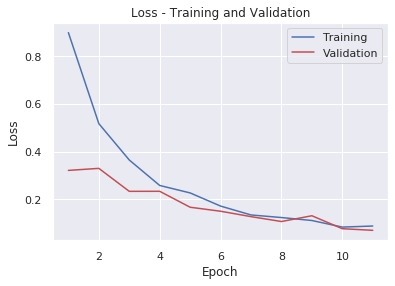

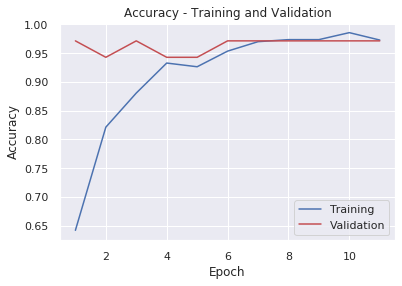

epoch,10
val_loss,0.07069
val_accuracy,0.97143
loss,0.08867
accuracy,0.97286
_runtime,48
_timestamp,1621002781
_step,13
best_val_loss,0.07069
best_epoch,10
lr,0.001


epoch,▁▂▂▃▄▅▅▆▇▇█
val_loss,██▅▅▄▃▃▂▃▁▁
val_accuracy,█▁█▁▁██████
loss,█▅▃▂▂▂▁▁▁▁▁
accuracy,▁▅▆▇▇▇█████
_runtime,▁▄▄▄▄▅▅▅▆▆▆▇██
_timestamp,▁▄▄▄▄▅▅▅▆▆▆▇██
_step,▁▂▂▃▃▄▄▅▅▆▆▇▇█
lr,▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 2/5


Epoch 1/100
 - 10s - loss: 0.8044 - accuracy: 0.6921 - val_loss: 0.9738 - val_accuracy: 0.6571
Epoch 2/100
 - 1s - loss: 0.4724 - accuracy: 0.8486 - val_loss: 0.6675 - val_accuracy: 0.7143
Epoch 3/100
 - 1s - loss: 0.3215 - accuracy: 0.9021 - val_loss: 0.5981 - val_accuracy: 0.8000
Epoch 4/100
 - 1s - loss: 0.2459 - accuracy: 0.9250 - val_loss: 0.4959 - val_accuracy: 0.7429
Epoch 5/100
 - 1s - loss: 0.1862 - accuracy: 0.9471 - val_loss: 0.3940 - val_accuracy: 0.8286
Epoch 6/100
 - 1s - loss: 0.1570 - accuracy: 0.9600 - val_loss: 0.4480 - val_accuracy: 0.7714
Epoch 7/100
 - 1s - loss: 0.1400 - accuracy: 0.9571 - val_loss: 0.3618 - val_accuracy: 0.8571
Epoch 8/100
 - 1s - loss: 0.1313 - accuracy: 0.9600 - val_loss: 0.3228 - val_accuracy: 0.9143
Epoch 9/100
 - 1s - loss: 0.1033 - accuracy: 0.9707 - val_loss: 0.1957 - val_accuracy: 0.9429
Epoch 10/100
 - 1s - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 11/100
 - 1s - loss: 0.0746 - accuracy: 0.9814 - val

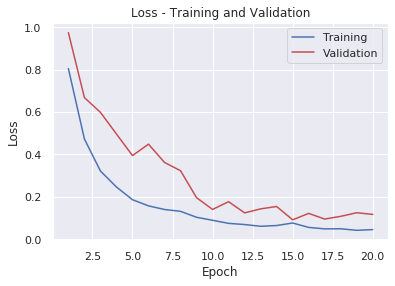

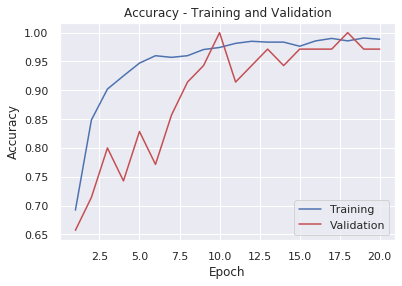

epoch,19
val_loss,0.1168
val_accuracy,0.97143
loss,0.04521
accuracy,0.98857
_runtime,56
_timestamp,1621002850
_step,22
best_val_loss,0.09131
best_epoch,14
lr,0.001


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▆▅▄▃▄▃▃▂▁▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▃▅▃▅▆▇█▆▇▇▇▇▇▇█▇▇
loss,█▅▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▆▆▇▇▇▇████████████
_runtime,▁▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇███
_timestamp,▁▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇███
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 3/5


Epoch 1/100
 - 10s - loss: 0.8332 - accuracy: 0.6857 - val_loss: 0.5834 - val_accuracy: 0.8000
Epoch 2/100
 - 1s - loss: 0.5484 - accuracy: 0.8421 - val_loss: 0.3769 - val_accuracy: 0.8286
Epoch 3/100
 - 1s - loss: 0.3653 - accuracy: 0.8964 - val_loss: 0.2620 - val_accuracy: 0.9143
Epoch 4/100
 - 1s - loss: 0.2782 - accuracy: 0.9200 - val_loss: 0.2118 - val_accuracy: 0.9429
Epoch 5/100
 - 1s - loss: 0.1853 - accuracy: 0.9543 - val_loss: 0.1798 - val_accuracy: 0.9429
Epoch 6/100
 - 1s - loss: 0.1571 - accuracy: 0.9600 - val_loss: 0.1539 - val_accuracy: 0.9429
Epoch 7/100
 - 1s - loss: 0.1181 - accuracy: 0.9757 - val_loss: 0.1609 - val_accuracy: 0.9429
Epoch 8/100
 - 1s - loss: 0.0971 - accuracy: 0.9786 - val_loss: 0.1754 - val_accuracy: 0.9429
Epoch 9/100
 - 1s - loss: 0.0890 - accuracy: 0.9821 - val_loss: 0.1417 - val_accuracy: 0.9429
Epoch 10/100
 - 1s - loss: 0.0807 - accuracy: 0.9807 - val_loss: 0.2018 - val_accuracy: 0.9429
Epoch 11/100
 - 1s - loss: 0.0687 - accuracy: 0.9857 - val

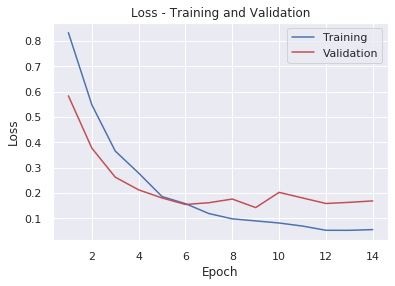

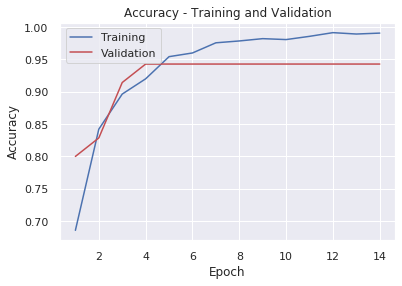

epoch,13
val_loss,0.16808
val_accuracy,0.94286
loss,0.05468
accuracy,0.99071
_runtime,52
_timestamp,1621002914
_step,16
best_val_loss,0.14168
best_epoch,8
lr,0.001


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
val_loss,█▅▃▂▂▁▁▂▁▂▂▁▁▁
val_accuracy,▁▂▇███████████
loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁
accuracy,▁▅▆▆▇▇████████
_runtime,▁▄▄▄▅▅▅▅▅▆▆▆▆▆███
_timestamp,▁▄▄▄▅▅▅▅▅▆▆▆▆▆███
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 4/5


Epoch 1/100
 - 10s - loss: 0.8115 - accuracy: 0.6736 - val_loss: 0.7025 - val_accuracy: 0.8571
Epoch 2/100
 - 1s - loss: 0.5020 - accuracy: 0.8436 - val_loss: 0.4090 - val_accuracy: 0.8857
Epoch 3/100
 - 1s - loss: 0.3702 - accuracy: 0.8843 - val_loss: 0.2756 - val_accuracy: 0.9429
Epoch 4/100
 - 1s - loss: 0.2831 - accuracy: 0.9114 - val_loss: 0.2429 - val_accuracy: 0.9429
Epoch 5/100
 - 1s - loss: 0.2054 - accuracy: 0.9421 - val_loss: 0.1767 - val_accuracy: 0.9714
Epoch 6/100
 - 1s - loss: 0.1712 - accuracy: 0.9543 - val_loss: 0.1333 - val_accuracy: 0.9714
Epoch 7/100
 - 1s - loss: 0.1366 - accuracy: 0.9664 - val_loss: 0.1228 - val_accuracy: 0.9714
Epoch 8/100
 - 1s - loss: 0.1135 - accuracy: 0.9700 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 9/100
 - 1s - loss: 0.1054 - accuracy: 0.9750 - val_loss: 0.1186 - val_accuracy: 0.9714
Epoch 10/100
 - 1s - loss: 0.0913 - accuracy: 0.9786 - val_loss: 0.0949 - val_accuracy: 0.9714
Epoch 11/100
 - 1s - loss: 0.0808 - accuracy: 0.9821 - val

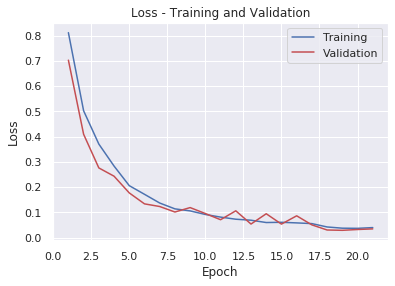

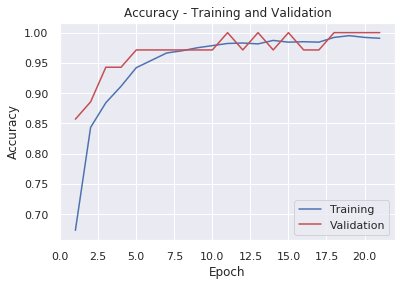

epoch,20
val_loss,0.03419
val_accuracy,1.0
loss,0.03929
accuracy,0.99071
_runtime,59
_timestamp,1621002985
_step,23
best_val_loss,0.0285
best_epoch,18
lr,0.001


epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▁
val_accuracy,▁▂▅▅▇▇▇▇▇▇█▇█▇█▇▇████
loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▆▆▇▇▇▇█████████████
_runtime,▁▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇███
_timestamp,▁▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇███
_step,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished
FOLD 5/5


Epoch 1/100
 - 10s - loss: 0.8008 - accuracy: 0.7064 - val_loss: 0.7418 - val_accuracy: 0.7429
Epoch 2/100
 - 1s - loss: 0.4800 - accuracy: 0.8393 - val_loss: 0.5347 - val_accuracy: 0.7714
Epoch 3/100
 - 1s - loss: 0.3315 - accuracy: 0.8964 - val_loss: 0.4191 - val_accuracy: 0.8857
Epoch 4/100
 - 1s - loss: 0.2466 - accuracy: 0.9336 - val_loss: 0.4669 - val_accuracy: 0.8857
Epoch 5/100
 - 1s - loss: 0.1786 - accuracy: 0.9529 - val_loss: 0.3262 - val_accuracy: 0.8857
Epoch 6/100
 - 1s - loss: 0.1437 - accuracy: 0.9664 - val_loss: 0.2156 - val_accuracy: 0.8857
Epoch 7/100
 - 1s - loss: 0.1106 - accuracy: 0.9736 - val_loss: 0.2441 - val_accuracy: 0.8857
Epoch 8/100
 - 1s - loss: 0.0895 - accuracy: 0.9821 - val_loss: 0.1727 - val_accuracy: 0.9143
Epoch 9/100
 - 1s - loss: 0.0846 - accuracy: 0.9829 - val_loss: 0.2003 - val_accuracy: 0.9143
Epoch 10/100
 - 1s - loss: 0.0755 - accuracy: 0.9843 - val_loss: 0.3769 - val_accuracy: 0.8857
Epoch 11/100
 - 1s - loss: 0.0806 - accuracy: 0.9757 - val

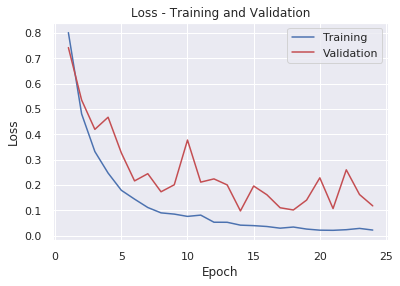

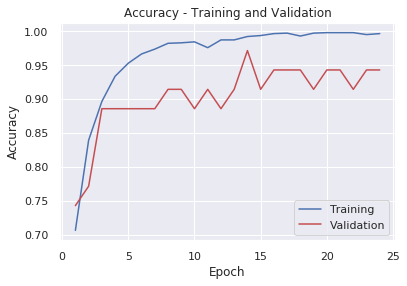

epoch,23
val_loss,0.11708
val_accuracy,0.94286
loss,0.02159
accuracy,0.99643
_runtime,63
_timestamp,1621003060
_step,26
best_val_loss,0.09712
best_epoch,13
lr,0.001


epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
val_loss,█▆▄▅▃▂▃▂▂▄▂▂▂▁▂▂▁▁▁▂▁▃▂▁
val_accuracy,▁▂▅▅▅▅▅▆▆▅▆▅▆█▆▇▇▇▆▇▇▆▇▇
loss,█▅▄▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▆▆▇▇▇███▇█████████████
_runtime,▁▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆███
_timestamp,▁▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆███
_step,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb run finished


In [20]:
config = load_default_config(drop_50_ppb_cols=False)
config.callbacks.save_model = True

models_all_samples = train_with_aug_kfold(config)

In [21]:
from utils import train_final_model

config = load_default_config(drop_50_ppb_cols=False)
config.callbacks.save_model = True
# Only need to train for 10 epochs based on results above.
config.fit_generator_model.epochs = 15

history, final_model_all_data = train_final_model(config)

Epoch 1/10
 - 9s - loss: 0.8057 - accuracy: 0.7177
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 1s - loss: 0.4950 - accuracy: 0.8274
Epoch 3/10
 - 1s - loss: 0.3225 - accuracy: 0.9109
Epoch 4/10
 - 1s - loss: 0.2321 - accuracy: 0.9354
Epoch 5/10
 - 1s - loss: 0.1636 - accuracy: 0.9629
Epoch 6/10
 - 1s - loss: 0.1387 - accuracy: 0.9657
Epoch 7/10
 - 1s - loss: 0.1253 - accuracy: 0.9651
Epoch 8/10
 - 1s - loss: 0.1068 - accuracy: 0.9754
Epoch 9/10
 - 1s - loss: 0.0779 - accuracy: 0.9840
Epoch 10/10
 - 1s - loss: 0.0722 - accuracy: 0.9851


epoch,9
loss,0.07221
accuracy,0.98514
_runtime,36
_timestamp,1621003685
_step,9


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▃▂▂▂▁▁▁
accuracy,▁▄▆▇▇▇▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


In [22]:
from utils import load_X_y_from_columns, scale_X_y, split_X_y

config = load_default_config(drop_50_ppb_cols=False)
# Load, scale
df_X_unscaled, df_y = load_X_y_from_columns(config)
df_X_scaled, df_y = scale_X_y(config, df_X_unscaled, df_y)

X = df_X_scaled.values
y = to_categorical(df_y.values, num_classes=4)

# Split
X_train, X_val, y_train, y_val = split_X_y(config, X, y)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [23]:
final_model_all_data.evaluate(X_train, y_train)

140/140 [==============================] - 2s 12ms/step


[0.07111345444406782, 0.9714285731315613]

In [24]:
final_model_all_data.evaluate(X_val, y_val)

35/35 [==============================] - 0s 352us/step


[0.021585756753172192, 1.0]

In [25]:
final_model_all_data.save(MODELS_DIR / 'final_model_with_50_ppb_samples.h5')